https://www.digitalmusicnews.com/2019/03/12/music-mood/

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,result
0,0,0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814,0
1,1,1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816,0
2,2,2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,4,0.368,0
3,3,3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227,0
4,4,4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 21 columns):
Unnamed: 0          232725 non-null int64
Unnamed: 0.1        232725 non-null int64
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null int64
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null int64
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null int64
valence             232725 non-null float64
result              232725 

In [0]:
unused_col = ['Unnamed: 0']
df = data.drop(columns=unused_col).reset_index(drop=True)

In [5]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [8]:
def rebalance(data):
    from tqdm import tqdm
    # remove `a capella class`
    data = data[data['genre'] != 'A Capella']
    # set maximum occurence of data
    max_val = 1000 
    # create new dataframe 
    _data = pd.DataFrame(columns=data.columns)
    
    # iteratively add sample of songs based on genre 
    for genre in tqdm(data['genre'].unique()):
        _data = _data.append(data[data['genre'] == genre].sample(n=max_val, random_state=1), ignore_index=True, sort=False)  
    return _data

df = rebalance(data)
df

100%|██████████| 26/26 [00:00<00:00, 35.64it/s]


,Unnamed: 0,Unnamed: 0.1,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,result
0,54177,54177,Movie,Claire Guyot,Un cri de femme,0kzmMGtPQiZdcY4tmTaJgk,0,0.110000,0.569,181441,0.8200,0.000600,8,0.0985,-4.924,0,0.0351,98.000,4,0.550,0
1,181988,181988,Movie,Terrence Mann,If I Can't Love Her,2NXDiOkPqRtXNsnFqyVmyM,41,0.876000,0.192,246213,0.0755,0.000976,1,0.0950,-21.081,1,0.0467,178.580,4,0.149,1
2,194157,194157,Movie,Hélène Ségara,Dans les yeux d'Émilie,4Jo2BHtqyZGwbQdTAOwXYK,23,0.025000,0.513,235547,0.9500,0.000000,1,0.0945,-4.821,0,0.1640,148.013,4,0.286,0
3,54559,54559,Movie,Robby Benson,Forever,6lfRDgwr3MMATCSOKMkKvo,1,0.666000,0.441,237067,0.2540,0.000277,12,0.1100,-11.347,1,0.0294,81.983,4,0.187,1
4,194105,194105,Movie,Anais Delva,Et je danse,6S2P0iPqpItJCREgVj7sqp,25,0.250000,0.574,187834,0.6290,0.000000,11,0.1090,-6.497,0,0.0444,94.982,4,0.370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,218596,218596,World,Phil Wickham,Stand In Awe,6bIPCaM77s4ZdQlr6FddtB,28,0.021400,0.407,244693,0.6750,0.000000,10,0.1650,-5.123,1,0.0334,147.924,4,0.384,0
25996,220023,220023,World,River Valley Worship,Here for a Reason,25QdwG3SG4YPJCktgHzZl3,21,0.000683,0.437,292227,0.9210,0.000134,6,0.3670,-3.790,1,0.0401,178.027,4,0.802,0
25997,210360,210360,World,Planetshakers,We Are Free - Live,3rAjNKp5vIObS6sSiWZ9wB,43,0.000035,0.564,303627,0.9600,0.000137,8,0.7000,-3.270,1,0.0624,124.000,4,0.253,1
25998,208582,208582,World,Rodrigo y Gabriela,Echoes,4OvRJwFYZsu3s0pw2HqdDZ,36,0.730000,0.502,1137587,0.6530,0.811000,10,0.1310,-7.822,1,0.0544,107.408,4,0.453,0


In [9]:
df = rebalance(df)
df

100%|██████████| 26/26 [00:00<00:00, 67.72it/s]


,Unnamed: 0,Unnamed: 0.1,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,result
0,194730,194730,Movie,Randy Newman,Escape Attempt - Awakenings - Original Motion ...,5YxU6GIF804YH3MG9UccfS,8,0.9390,0.153,50560,0.128,0.940,8,0.1210,-18.350,1,0.0428,47.394,4,0.0326,0
1,183842,183842,Movie,Paige O'Hara,"Belle - From ""Beauty And The Beast""",46IzB5WAmWLvHTtQolaUVU,11,0.7850,0.498,64253,0.273,0.000,12,0.3480,-8.407,1,0.0563,121.765,4,0.2590,0
2,195127,195127,Movie,Riders In The Sky,Lonely Yukon Stars,2xHP1JHwn0WCVimGbiXoHx,3,0.9680,0.430,80563,0.198,0.000,6,0.8000,-15.464,1,0.0670,134.144,4,0.4510,0
3,194875,194875,Movie,Emmanuel Moire,Le bienveillant,4UsEBIAxjKKJ3UwVb1v0PJ,32,0.5940,0.598,188267,0.493,0.000,5,0.0926,-7.476,0,0.0515,180.086,4,0.5940,0
4,55481,55481,Movie,Bruno Pelletier,Mon hasard,0mCxjK5pyQMe08ITZpFoGF,4,0.0581,0.597,184920,0.714,0.000,3,0.0873,-6.699,1,0.0308,93.958,4,0.4900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,218188,218188,World,Kent Henry,I Sing Praises to Your Name,0hsK9ErrYGVZshnLBY6X0m,34,0.2380,0.212,318600,0.403,0.000,8,0.6110,-15.859,1,0.0344,112.390,4,0.3570,0
25996,208657,208657,World,Rodrigo y Gabriela,"Angry and Dead Again - From ""Pirates of the Ca...",79768hVMwOfHlrnu5KNJdO,39,0.7190,0.527,332267,0.415,0.863,3,0.0623,-16.475,0,0.0588,110.041,4,0.3220,0
25997,207181,207181,World,Matt Maher,"Lord, I Need You",4EHWldZTas5KUyFtT0rQlY,67,0.5170,0.457,205667,0.451,0.000,11,0.0928,-6.997,1,0.0290,74.923,4,0.1850,1
25998,219832,219832,World,Mayra Andrade,Tan Kalakatan,3wWTlbZ83suOogJ3lJoLz6,35,0.3050,0.798,237813,0.518,0.153,11,0.1010,-8.191,0,0.0827,139.971,4,0.3840,0


Text(0.5, 1.0, 'Genre Based on Popularity')

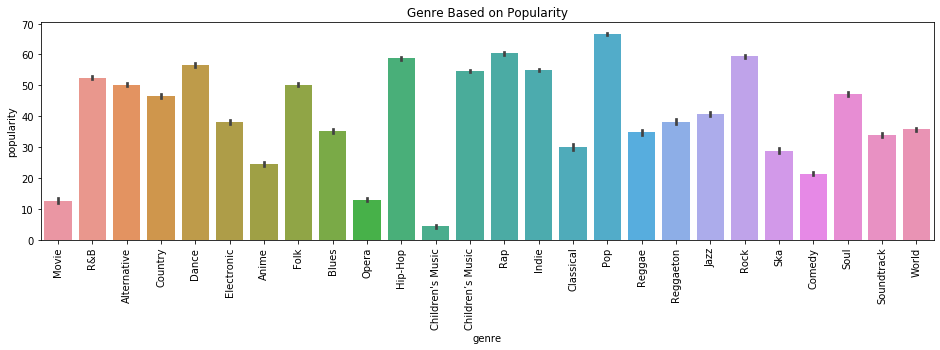

In [10]:
plt.subplots(figsize=(16, 4)) 
sns.barplot(x = 'genre', y = 'popularity', data = df)
plt.xticks(rotation=90)
plt.title('Genre Based on Popularity')

In [11]:
plt.figure(figsize=(16,4))
sns.countplot(x=df['artist_name'],data=df, linewidth=2, edgecolor='black')
plt.xticks(rotation=90)
plt.show()

ValueError: ignored

<Figure size 1152x288 with 1 Axes>

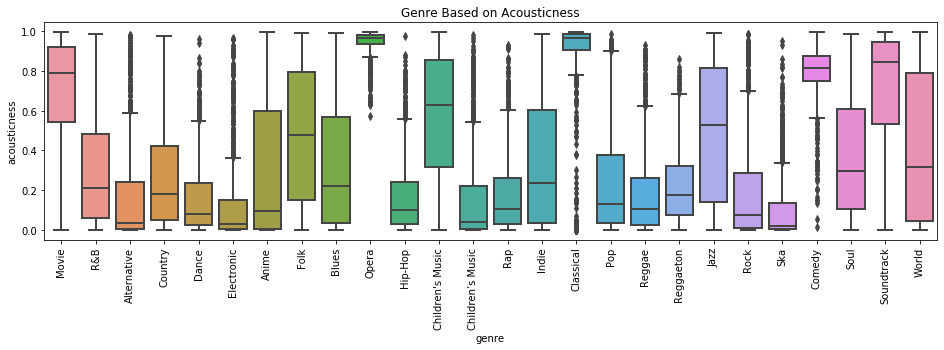

In [12]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='acousticness', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Acousticness')
plt.show()

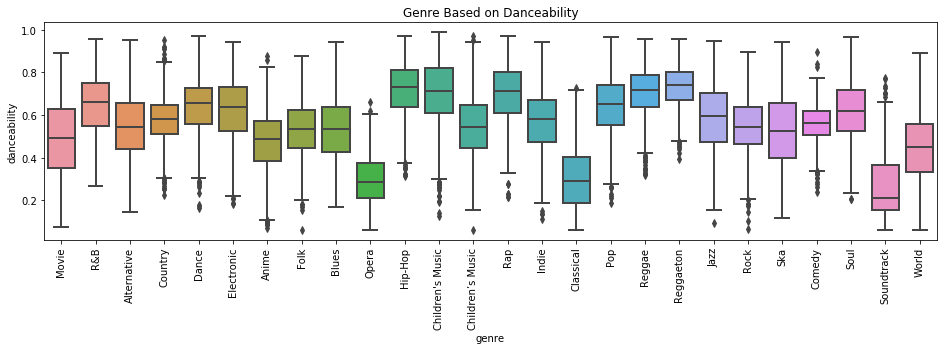

In [13]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='danceability', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Danceability')
plt.show()

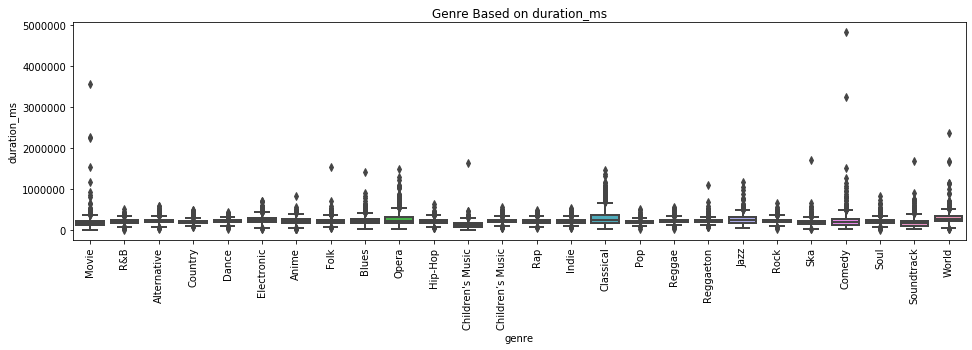

In [14]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='duration_ms', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on duration_ms')
plt.show()

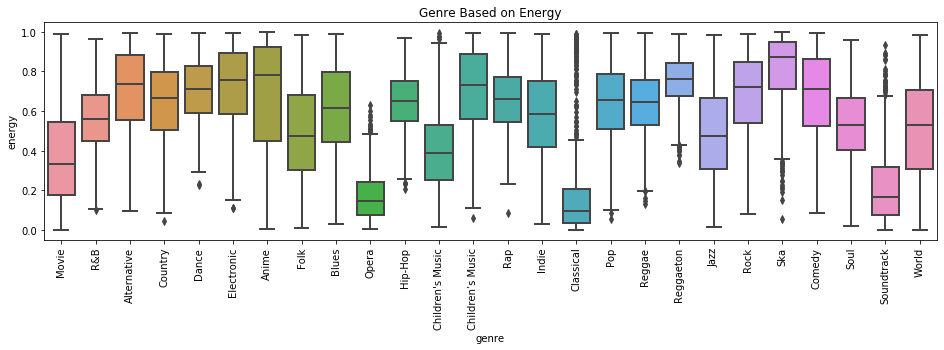

In [15]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='energy', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Energy')
plt.show()

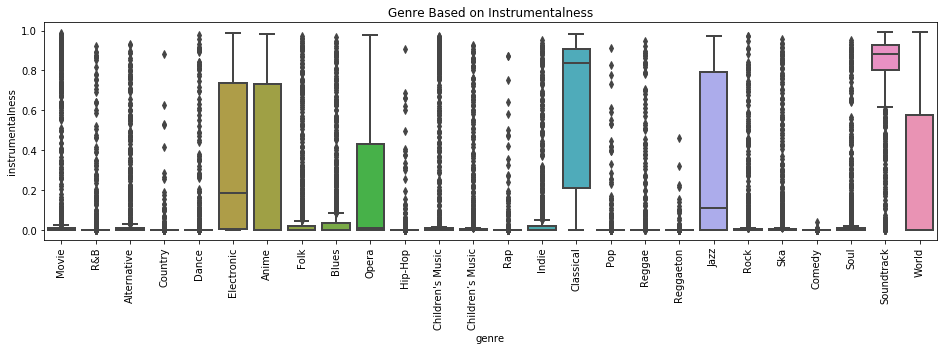

In [16]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='instrumentalness', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Instrumentalness')
plt.show()

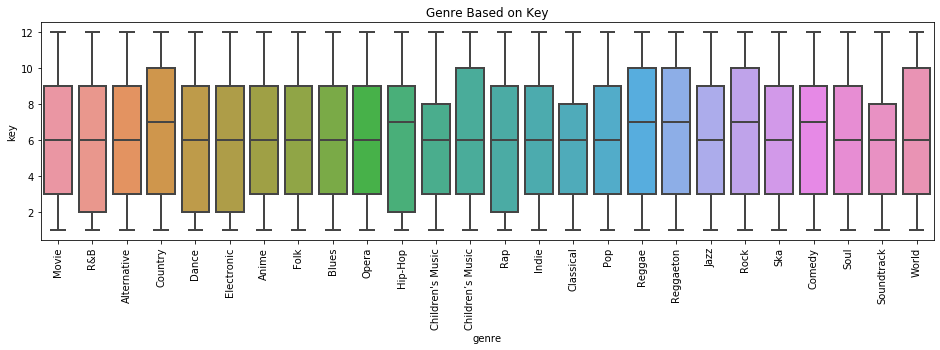

In [17]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='key', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Key')
plt.show()

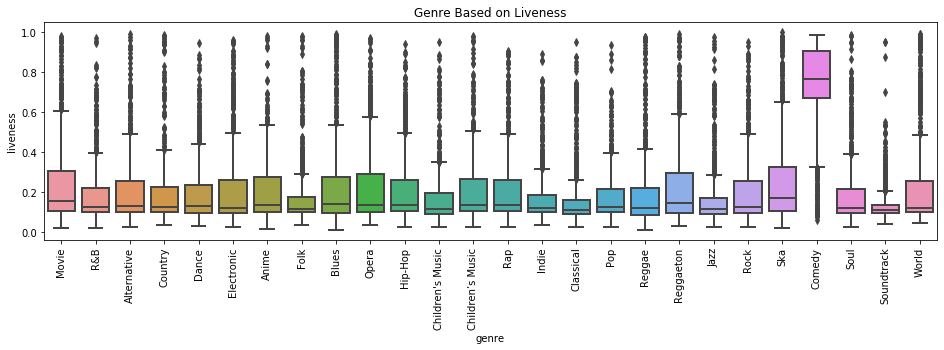

In [18]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='liveness', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Liveness')
plt.show()

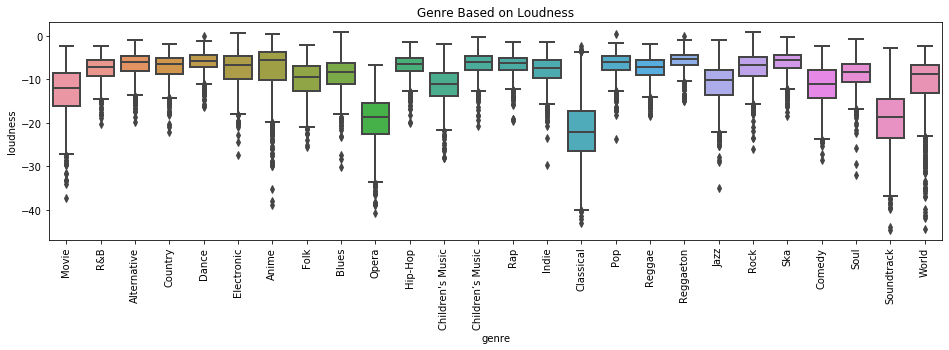

In [19]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='loudness', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Loudness')
plt.show()

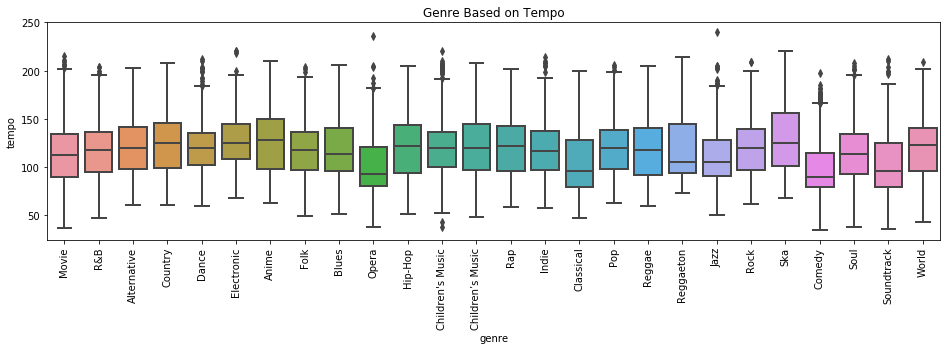

In [20]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='tempo', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Tempo')
plt.show()

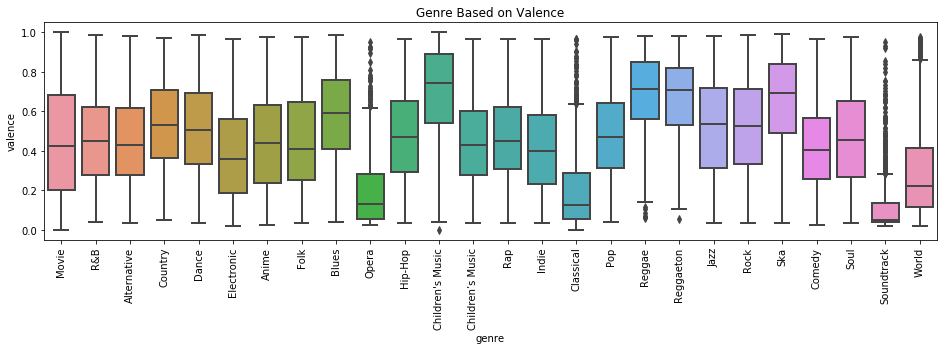

In [21]:
plt.figure(figsize=(16,4))
sns.boxplot(x='genre', y='valence', data = df, linewidth=2)
plt.xticks(rotation=90)
plt.title('Genre Based on Valence')
plt.show()

In [22]:
df['mood'] = df['genre'].copy()
mood = {'Blues' : 'Sad',
        'Indie' : 'Sad',
        'Jazz' : 'Sad',
        'Soundtrack' : 'Sad',
        'Reggae' : 'Happy',
        'Opera' : 'Happy',
        'Movie' : 'Happy',
        'Anime' : 'Happy',
        'Children’s Music' : 'Happy',
        "Children's Music" : 'Happy',
        'Alternative' : 'Angry',
        'Rock' : 'Angry',
        'A Capella' : 'Heartbroken',
        'R&B' : 'Heartbroken',
        'Soul' : 'Heartbroken',
        'Comedy' : 'Heartbroken',
        'Classical' : 'Focus',
        'Dance' : 'Energized',
        'Electronic' : 'Energized',
        'Hip-Hop' : 'Energized',
        'Rap' : 'Energized',
        'Pop' : 'In Love',
        'Country' : 'Chill',
        'Folk' : 'Chill',
        'Reggaeton' : 'Chill',
        'Ska' : 'Chill',
        'World' : 'Chill'
    }

df['mood'] = df['mood'].replace(mood)
df

,Unnamed: 0,Unnamed: 0.1,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,result,mood
0,194730,194730,Movie,Randy Newman,Escape Attempt - Awakenings - Original Motion ...,5YxU6GIF804YH3MG9UccfS,8,0.9390,0.153,50560,0.128,0.940,8,0.1210,-18.350,1,0.0428,47.394,4,0.0326,0,Happy
1,183842,183842,Movie,Paige O'Hara,"Belle - From ""Beauty And The Beast""",46IzB5WAmWLvHTtQolaUVU,11,0.7850,0.498,64253,0.273,0.000,12,0.3480,-8.407,1,0.0563,121.765,4,0.2590,0,Happy
2,195127,195127,Movie,Riders In The Sky,Lonely Yukon Stars,2xHP1JHwn0WCVimGbiXoHx,3,0.9680,0.430,80563,0.198,0.000,6,0.8000,-15.464,1,0.0670,134.144,4,0.4510,0,Happy
3,194875,194875,Movie,Emmanuel Moire,Le bienveillant,4UsEBIAxjKKJ3UwVb1v0PJ,32,0.5940,0.598,188267,0.493,0.000,5,0.0926,-7.476,0,0.0515,180.086,4,0.5940,0,Happy
4,55481,55481,Movie,Bruno Pelletier,Mon hasard,0mCxjK5pyQMe08ITZpFoGF,4,0.0581,0.597,184920,0.714,0.000,3,0.0873,-6.699,1,0.0308,93.958,4,0.4900,0,Happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,218188,218188,World,Kent Henry,I Sing Praises to Your Name,0hsK9ErrYGVZshnLBY6X0m,34,0.2380,0.212,318600,0.403,0.000,8,0.6110,-15.859,1,0.0344,112.390,4,0.3570,0,Chill
25996,208657,208657,World,Rodrigo y Gabriela,"Angry and Dead Again - From ""Pirates of the Ca...",79768hVMwOfHlrnu5KNJdO,39,0.7190,0.527,332267,0.415,0.863,3,0.0623,-16.475,0,0.0588,110.041,4,0.3220,0,Chill
25997,207181,207181,World,Matt Maher,"Lord, I Need You",4EHWldZTas5KUyFtT0rQlY,67,0.5170,0.457,205667,0.451,0.000,11,0.0928,-6.997,1,0.0290,74.923,4,0.1850,1,Chill
25998,219832,219832,World,Mayra Andrade,Tan Kalakatan,3wWTlbZ83suOogJ3lJoLz6,35,0.3050,0.798,237813,0.518,0.153,11,0.1010,-8.191,0,0.0827,139.971,4,0.3840,0,Chill


In [23]:
df['mood'].value_counts()

Happy          6000
Chill          5000
Sad            4000
Energized      4000
Heartbroken    3000
Angry          2000
In Love        1000
Focus          1000
Name: mood, dtype: int64

In [0]:
df.to_csv('final_recom.csv')

In [25]:
df['popularity'].value_counts()

0     911
53    611
49    605
50    593
52    590
     ... 
88      2
94      1
96      1
93      1
97      1
Name: popularity, Length: 96, dtype: int64

##By Mood and Popularity

In [0]:
df['mood_popular'] = df.apply(lambda i: f"{i['result']},{(i['mood'])}",axis = 1)

In [27]:
count_vec = CountVectorizer(tokenizer= lambda x: x.split(','))
mood_extract = count_vec.fit_transform(df['mood_popular'])
count_vec.get_feature_names()

['0',
 '1',
 'angry',
 'chill',
 'energized',
 'focus',
 'happy',
 'heartbroken',
 'in love',
 'sad']

In [28]:
print(mood_extract.toarray())
print(mood_extract.toarray().shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
(26000, 10)


In [29]:
cosine_sim = cosine_similarity(mood_extract)
cosine_sim[0]

array([1. , 1. , 1. , ..., 0. , 0.5, 0. ])

In [30]:
joblib.dump(cosine_sim, 'ModelCosineSim')

['ModelCosineSim']

In [0]:
df = df.reset_index()
indices = pd.Series(df.index, index=df['track_name'])

In [0]:
def mood_recommendations(track_name, cosine_sim=cosine_sim):
    idx = indices[track_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return pd.DataFrame(df[['artist_name', 'track_name', 'track_id', 'popularity', 'mood']].iloc[song_indices])

In [33]:
mood_recommendations("Echoes", cosine_sim)

,artist_name,track_name,track_id,popularity,mood
3008,Del Reeves,The Girl On The Billboard,3T4zow8ial809ciFETZ6wM,39,Chill
3010,David Nail,I'm A Fire,4TJYWiSTtz5aOq5lbco9xU,34,Chill
3012,Johnny Cash,Oney,2p9cD6MdK6vZkj7GhXJCZj,40,Chill
3013,Clay Walker,I Can't Sleep - 2014 Version,4wGKVFDAFaIkdmKqgKERuK,38,Chill
3014,Maren Morris,I Wish I Was (Live from SXSW 2016),0LxN6gtI8oVH4tTiTutvXG,36,Chill
3016,Ryan Bingham,Sunshine,41J9mkbAwGq9LAJdeJuyc3,39,Chill
3024,Big & Rich,Smoke in Her Eyes,3nfBYidyvXiwccIBLFSGHt,38,Chill
3025,Blake Shelton,I'll Just Hold On,4ZTVWCfZewoOYhhIEIrAlT,36,Chill
3028,Carrie Underwood,You Won't Find This,6fFLZxvkPxvnFtpB9R42Vp,40,Chill
3029,Alan Jackson,Turn Your Eyes Upon Jesus,0LkK4ePBHSZ86gIwMYgYbO,39,Chill


In [34]:
mood_recommendations("If I Can't Love Her", cosine_sim)

,artist_name,track_name,track_id,popularity,mood
24,Audra McDonald,Danced with a Girl,1C7b64IN7iebIi1aekoIdG,3,Happy
34,Angela Lansbury,Me and My Town,4phkpBRrdaZ8yB13BQ2XoE,14,Happy
51,Dorothée,Monsieur de la Fontaine,579PRJNxwTeh3bPTMsXdvT,5,Happy
52,Justin Hurwitz,Karen,2NT69Bbw38JbjjhBqLr4dV,41,Happy
57,Larry Groce,Good Ole Boys Like Me,3kGLbQVvJFogp5lSRzrLFB,0,Happy
62,Randy Newman,Lucinda,19qNIS6KEUHEtWniZphvYJ,15,Happy
70,Judy Kuhn,Days and Days,7zOraN0T5rKw84A7q4JtzL,36,Happy
98,Sally Dworsky,Slow,25F00Ug03dR6YFf8nEG1LD,2,Happy
107,Josh Gad,You and Me (But Mostly Me),3VHDIvoYPrOkUQmirAn5vr,56,Happy
122,Robby Benson,Forever,6lfRDgwr3MMATCSOKMkKvo,1,Happy
